# Math23k Analysis Report

## Data Description
| Field             | Annotation                                          |
| --------          | --------------------------------------------------- |
| id                | Id of the problem |
| original_text	    | Original text of the problem |
| equation          | Solution to the problem |
| segmented_text    | Chinese word segmentation of the problem |


In [1]:
import numpy as np
import pandas as pd
import jieba

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [2]:
path = "../raw_data/math23k/raw/test23k.json"

data = pd.read_json(path, orient='records')

## Record Examples

In [3]:
data.head()

,id,original_text,equation,segmented_text
0,35,在一正方形花池的4周栽了44棵柳树，每两棵柳树之间的间隔是20米，这个正方形的周长=多少米？,x=44*20,在 一 正方形 花池 的 4 周 栽 了 44 棵 柳树 ， 每 两棵 柳树 之间 的 间隔...
1,65,张明有120元钱，买书用去80%，买文具的钱是买书的15%．买文具用去多少元？,x=120*80%*15%,张 明 有 120 元 钱 ， 买 书 用 去 80% ， 买 文具 的 钱 是 买 书 的...
2,118,一个工厂要生产3000个零件，前6天生产了750个，剩下的要在15天内完成，平均每天生产多少个？,x=(3000-750)/15,一 个 工厂 要 生产 3000 个 零件 ， 前 6 天 生产 了 750 个 ， 剩下 ...
3,163,一本字典定价9元，0.8出售后还赚20%，这本字典进价=多少元．,x=9*0.8/(1+20%),一 本 字典 定价 9 元 ， 0.8 出售 后 还 赚 20% ， 这本 字典 进价 = ...
4,233,修一段长324米的路，前8小时共修了240米，剩下的每小时修21米，还要几小时才能修完？,x=(324-240)/21,修 一段 长 324 米 的 路 ， 前 8 小时 共 修 了 240 米 ， 剩下 的 每...


## The number of problems

In [4]:
len(data['id'].unique())

1000

## Part of missing values for every column

In [5]:
data.isnull().sum() / len(data)

id                0.0
original_text     0.0
equation          0.0
segmented_text    0.0
dtype: float64

In [6]:

def cut_word(text):
    return jieba.lcut(text)

data['content']=data['original_text'].apply(cut_word)
data.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\THY\AppData\Local\Temp\jieba.cache
Loading model cost 0.766 seconds.
Prefix dict has been built succesfully.


,id,original_text,equation,segmented_text,content
0,35,在一正方形花池的4周栽了44棵柳树，每两棵柳树之间的间隔是20米，这个正方形的周长=多少米？,x=44*20,在 一 正方形 花池 的 4 周 栽 了 44 棵 柳树 ， 每 两棵 柳树 之间 的 间隔...,"[在, 一, 正方形, 花池, 的, 4, 周栽, 了, 44, 棵, 柳树, ，, 每, ..."
1,65,张明有120元钱，买书用去80%，买文具的钱是买书的15%．买文具用去多少元？,x=120*80%*15%,张 明 有 120 元 钱 ， 买 书 用 去 80% ， 买 文具 的 钱 是 买 书 的...,"[张明, 有, 120, 元, 钱, ，, 买书用, 去, 80%, ，, 买, 文具, 的..."
2,118,一个工厂要生产3000个零件，前6天生产了750个，剩下的要在15天内完成，平均每天生产多少个？,x=(3000-750)/15,一 个 工厂 要 生产 3000 个 零件 ， 前 6 天 生产 了 750 个 ， 剩下 ...,"[一个, 工厂, 要, 生产, 3000, 个, 零件, ，, 前, 6, 天, 生产, 了..."
3,163,一本字典定价9元，0.8出售后还赚20%，这本字典进价=多少元．,x=9*0.8/(1+20%),一 本 字典 定价 9 元 ， 0.8 出售 后 还 赚 20% ， 这本 字典 进价 = ...,"[一本, 字典, 定价, 9, 元, ，, 0.8, 出售, 后, 还, 赚, 20%, ，..."
4,233,修一段长324米的路，前8小时共修了240米，剩下的每小时修21米，还要几小时才能修完？,x=(324-240)/21,修 一段 长 324 米 的 路 ， 前 8 小时 共 修 了 240 米 ， 剩下 的 每...,"[修, 一段, 长, 324, 米, 的, 路, ，, 前, 8, 小时, 共修, 了, 2..."


## Count of words of problems

In [7]:
def getsize(ser):
    return len(ser)

data['word_count']=data['content'].apply(getsize)
data.head()

,id,original_text,equation,segmented_text,content,word_count
0,35,在一正方形花池的4周栽了44棵柳树，每两棵柳树之间的间隔是20米，这个正方形的周长=多少米？,x=44*20,在 一 正方形 花池 的 4 周 栽 了 44 棵 柳树 ， 每 两棵 柳树 之间 的 间隔...,"[在, 一, 正方形, 花池, 的, 4, 周栽, 了, 44, 棵, 柳树, ，, 每, ...",30
1,65,张明有120元钱，买书用去80%，买文具的钱是买书的15%．买文具用去多少元？,x=120*80%*15%,张 明 有 120 元 钱 ， 买 书 用 去 80% ， 买 文具 的 钱 是 买 书 的...,"[张明, 有, 120, 元, 钱, ，, 买书用, 去, 80%, ，, 买, 文具, 的...",27
2,118,一个工厂要生产3000个零件，前6天生产了750个，剩下的要在15天内完成，平均每天生产多少个？,x=(3000-750)/15,一 个 工厂 要 生产 3000 个 零件 ， 前 6 天 生产 了 750 个 ， 剩下 ...,"[一个, 工厂, 要, 生产, 3000, 个, 零件, ，, 前, 6, 天, 生产, 了...",30
3,163,一本字典定价9元，0.8出售后还赚20%，这本字典进价=多少元．,x=9*0.8/(1+20%),一 本 字典 定价 9 元 ， 0.8 出售 后 还 赚 20% ， 这本 字典 进价 = ...,"[一本, 字典, 定价, 9, 元, ，, 0.8, 出售, 后, 还, 赚, 20%, ，...",20
4,233,修一段长324米的路，前8小时共修了240米，剩下的每小时修21米，还要几小时才能修完？,x=(324-240)/21,修 一段 长 324 米 的 路 ， 前 8 小时 共 修 了 240 米 ， 剩下 的 每...,"[修, 一段, 长, 324, 米, 的, 路, ，, 前, 8, 小时, 共修, 了, 2...",29


In [8]:
cnt = data['word_count'].value_counts().reset_index()
cnt.columns = [ 'word_count' , 'problem_count']

fig = px.bar(
    cnt , x = 'word_count', y = 'problem_count' ,
    title = 'The length of problems'
)
fig.show()

## Delete stopword

In [9]:
def get_stopword():
    s = set()
    with open("../raw_data/stopword/stopword.txt","r",encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s

def delete_stopword(words):
    return [w for w in words if (w not in stopword)]

stopword=get_stopword()
data['content']=data['content'].apply(delete_stopword)
data.head()

,id,original_text,equation,segmented_text,content,word_count
0,35,在一正方形花池的4周栽了44棵柳树，每两棵柳树之间的间隔是20米，这个正方形的周长=多少米？,x=44*20,在 一 正方形 花池 的 4 周 栽 了 44 棵 柳树 ， 每 两棵 柳树 之间 的 间隔...,"[正方形, 花池, 周栽, 44, 棵, 柳树, 两棵, 柳树, 之间, 间隔, 20, 米...",30
1,65,张明有120元钱，买书用去80%，买文具的钱是买书的15%．买文具用去多少元？,x=120*80%*15%,张 明 有 120 元 钱 ， 买 书 用 去 80% ， 买 文具 的 钱 是 买 书 的...,"[张明, 120, 元, 钱, 买书用, 80%, 买, 文具, 钱, 买, 书, 15%,...",27
2,118,一个工厂要生产3000个零件，前6天生产了750个，剩下的要在15天内完成，平均每天生产多少个？,x=(3000-750)/15,一 个 工厂 要 生产 3000 个 零件 ， 前 6 天 生产 了 750 个 ， 剩下 ...,"[工厂, 生产, 3000, 零件, 前, 天, 生产, 750, 剩下, 15, 天内, ...",30
3,163,一本字典定价9元，0.8出售后还赚20%，这本字典进价=多少元．,x=9*0.8/(1+20%),一 本 字典 定价 9 元 ， 0.8 出售 后 还 赚 20% ， 这本 字典 进价 = ...,"[一本, 字典, 定价, 元, 0.8, 出售, 赚, 20%, 这本, 字典, 进价, 元]",20
4,233,修一段长324米的路，前8小时共修了240米，剩下的每小时修21米，还要几小时才能修完？,x=(324-240)/21,修 一段 长 324 米 的 路 ， 前 8 小时 共 修 了 240 米 ， 剩下 的 每...,"[修, 一段, 长, 324, 米, 路, 前, 小时, 共修, 240, 米, 剩下, 小...",29


## The keywords

In [10]:
import jieba.analyse
def get_keyword(text):
    topk = min(3,len(text))
    keyword = [word for word in jieba.analyse.textrank(text, topK = topk)]
    return keyword

data['keywords']=data['original_text'].apply(get_keyword)
data.head()

,id,original_text,equation,segmented_text,content,word_count,keywords
0,35,在一正方形花池的4周栽了44棵柳树，每两棵柳树之间的间隔是20米，这个正方形的周长=多少米？,x=44*20,在 一 正方形 花池 的 4 周 栽 了 44 棵 柳树 ， 每 两棵 柳树 之间 的 间隔...,"[正方形, 花池, 周栽, 44, 棵, 柳树, 两棵, 柳树, 之间, 间隔, 20, 米...",30,"[正方形, 花池, 周长]"
1,65,张明有120元钱，买书用去80%，买文具的钱是买书的15%．买文具用去多少元？,x=120*80%*15%,张 明 有 120 元 钱 ， 买 书 用 去 80% ， 买 文具 的 钱 是 买 书 的...,"[张明, 120, 元, 钱, 买书用, 80%, 买, 文具, 钱, 买, 书, 15%,...",27,"[用去, 买书]"
2,118,一个工厂要生产3000个零件，前6天生产了750个，剩下的要在15天内完成，平均每天生产多少个？,x=(3000-750)/15,一 个 工厂 要 生产 3000 个 零件 ， 前 6 天 生产 了 750 个 ， 剩下 ...,"[工厂, 生产, 3000, 零件, 前, 天, 生产, 750, 剩下, 15, 天内, ...",30,"[生产, 工厂, 完成]"
3,163,一本字典定价9元，0.8出售后还赚20%，这本字典进价=多少元．,x=9*0.8/(1+20%),一 本 字典 定价 9 元 ， 0.8 出售 后 还 赚 20% ， 这本 字典 进价 = ...,"[一本, 字典, 定价, 元, 0.8, 出售, 赚, 20%, 这本, 字典, 进价, 元]",20,"[字典, 定价, 进价]"
4,233,修一段长324米的路，前8小时共修了240米，剩下的每小时修21米，还要几小时才能修完？,x=(324-240)/21,修 一段 长 324 米 的 路 ， 前 8 小时 共 修 了 240 米 ， 剩下 的 每...,"[修, 一段, 长, 324, 米, 路, 前, 小时, 共修, 240, 米, 剩下, 小...",29,"[小时, 才能, 剩下]"
...,...,...,...,...,...,...,...
995,23054,我国第一长河--长江全长6380km，黄河比长江的(9/10)要短278km．黄河全长多少千米？,x=6380*(9/10)-278,我国 第一 长河 - - 长江 全长 6380km ， 黄河 比 长江 的 (9/10) 要...,"[我国, 第一, 长河, 长江, 全长, 6380km, 黄河, 长江, 10, 短, 27...",27,"[全长, 长江, 黄河]"
996,23066,一本文艺书，小明第一天看了全书的(1/3)，第二天看了余下的(3/5)，还剩下48页，这本书...,x=48/[1-(1/3)-(1-(1/3))*(3/5)],一 本 文艺 书 ， 小 明 第一天 看 了 全书 的 (1/3) ， 第 二 天 看 了 ...,"[一本, 文艺, 书, 小明, 第一天, 全书, 第二天, 余下, 剩下, 48, 页, 本...",38,[]
997,23085,学校建综合楼，实际投资170万元，比计划节约了15%，计划投资多少万元？,x=170/(1-15%),学校 建 综合楼 ， 实际 投资 170 万元 ， 比 计划 节约 了 15% ， 计划 投...,"[学校, 建, 综合楼, 投资, 170, 万元, 计划, 节约, 15%, 计划, 投资,...",20,"[投资, 综合楼, 实际]"
998,23131,每包30本，一共要寄240本书，需要几包？,x=240/30,每包 30 本 ， 一共 要 寄 240 本书 ， 需要 几包 ？,"[每包, 30, 一共, 寄, 240, 本书, 几包]",13,[]


## Number of operators

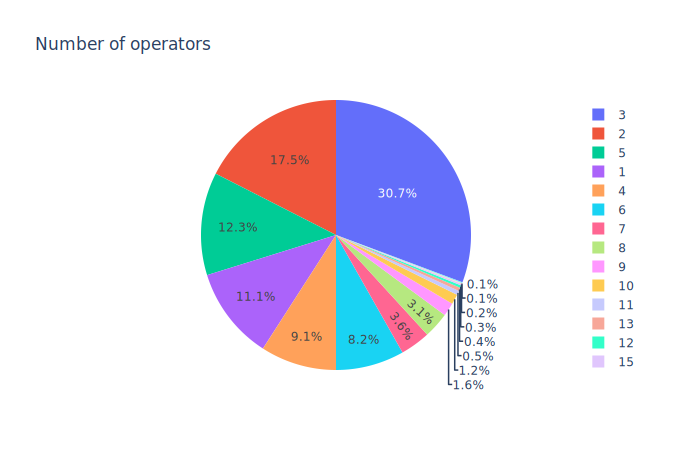

In [175]:
def num_of_operators(equation):
    cnt = 0
    for op in equation:
        if op =='(' or op == '+' or op == '-' or op == '*' or op == '/' or op == '^':
            cnt += 1
    return cnt

tmp = data.loc[:,['equation']]
tmp['operators_cnt'] = tmp['equation'].apply(num_of_operators)
cnt = tmp['operators_cnt'].value_counts().reset_index()
cnt.columns=['number of operators','number of problems']

fig = px.pie(
    cnt,
    names = 'number of operators',
    values = 'number of problems',
    title = 'Number of operators'    
)

fig.show("svg")

## Evaluate difficulty

In [176]:
def calc_difficulty(equation):
    difficulty = 0

    def eval(x):
        if x == '+' : return 2
        elif x == '-' : return 3
        elif x == '*' : return 5
        elif x == '/' : return 7
        elif x == '(' : return 8
        elif x == '%' : return 5
        elif x == '^' : return 6
        else : return 0

    for op in equation:
        difficulty += eval(op)
    return difficulty


data['difficulty'] = data['equation'].apply(calc_difficulty)

cnt = data['difficulty'].value_counts().reset_index()
cnt.columns = [ 'difficulty' , 'problem_count']

fig = px.bar(
    cnt , x = 'difficulty', y = 'problem_count' ,
    title = 'The difficulty of problems'
)
fig.show()

## The most difficult problems

In [177]:
tmp = data[['id','original_text','difficulty']]
tmp = tmp.sort_values(['difficulty']).tail(10)
tmp ['id'] = tmp['id'] . astype(str)
fig = px.bar(
    tmp , x = 'difficulty', y = 'id' ,
    orientation = 'h',
    title = 'The difficulty of problems'
)
fig.show()